<a href="https://colab.research.google.com/github/Ahmed-M-Elshazly/Homework-4/blob/main/Homework_4_Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4 Problem 1
# Ahmed Elshazly
# 801420724

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [2]:
breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape


(569, 30)

In [3]:
breast_input = pd.DataFrame(breast_data)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
breast_labels = breast.target
breast_labels.shape
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
dataset=breast_dataset
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
dataset['label'].replace(0, 'Benign',inplace=True)
dataset['label'].replace(1, 'Malignant',inplace=True)
dataset.tail()

<ipython-input-5-d44cf39f2842>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['label'].replace(0, 'Benign',inplace=True)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [6]:
X = dataset.iloc[:, 0:30].values
Y = dataset.iloc[:, 30].values
print(X[564, :])
print(Y[564])

[2.156e+01 2.239e+01 1.420e+02 1.479e+03 1.110e-01 1.159e-01 2.439e-01
 1.389e-01 1.726e-01 5.623e-02 1.176e+00 1.256e+00 7.673e+00 1.587e+02
 1.030e-02 2.891e-02 5.198e-02 2.454e-02 1.114e-02 4.239e-03 2.545e+01
 2.640e+01 1.661e+02 2.027e+03 1.410e-01 2.113e-01 4.107e-01 2.216e-01
 2.060e-01 7.115e-02]
Benign


In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

Optimal K for maximum accuracy with kernel linear: 8
Accuracy at optimal K with kernel linear: 0.9736842105263158


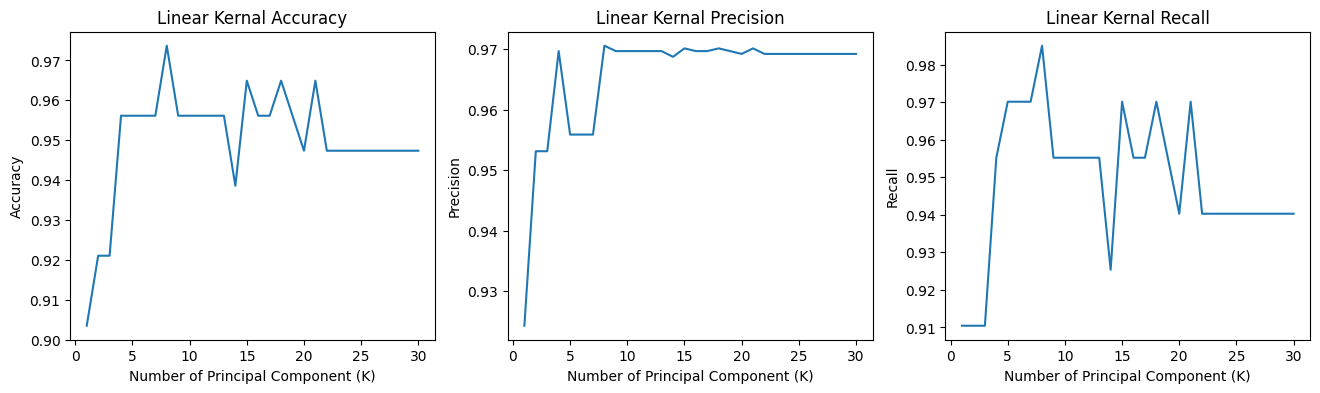

In [8]:
# Linear kernel
accuracies_linear=[]
precisions_linear=[]
recalls_linear=[]
N = [i for i in range(1,31)]
for K in N:
  pca = PCA(n_components=K)
  principalDf = pd.DataFrame(data = pca.fit_transform(X))
  X_train, X_test, Y_train, Y_test = train_test_split(principalDf.values, Y, test_size = 0.2, random_state = 0)
  classifier = SVC(kernel='linear', C=3)
  classifier.fit(X_train, Y_train)
  Y_pred = classifier.predict(X_test)
  acc=metrics.accuracy_score(Y_test, Y_pred)
  prec=metrics.precision_score(Y_test, Y_pred,pos_label='Malignant')
  rec=metrics.recall_score(Y_test, Y_pred,pos_label='Malignant')
  accuracies_linear.append(acc)
  precisions_linear.append(prec)
  recalls_linear.append(rec)

plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.plot(N, accuracies_linear)
plt.title('Linear Kernal Accuracy')
plt.xlabel('Number of Principal Component (K)')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(N, precisions_linear)
plt.title('Linear Kernal Precision')
plt.xlabel('Number of Principal Component (K)')
plt.ylabel('Precision')

plt.subplot(1, 3, 3)
plt.plot(N, recalls_linear)
plt.title('Linear Kernal Recall')
plt.xlabel('Number of Principal Component (K)')
plt.ylabel('Recall')

optimal_k_linear = N[accuracies_linear.index(max(accuracies_linear))]
optimal_accuracy_linear = max(accuracies_linear)
print(f"Optimal K for maximum accuracy with kernel linear: {optimal_k_linear}")
print(f"Accuracy at optimal K with kernel linear: {optimal_accuracy_linear}")



Optimal K for maximum accuracy with kernel RBF: 8
Accuracy at optimal K with kernel RBF: 0.9912280701754386


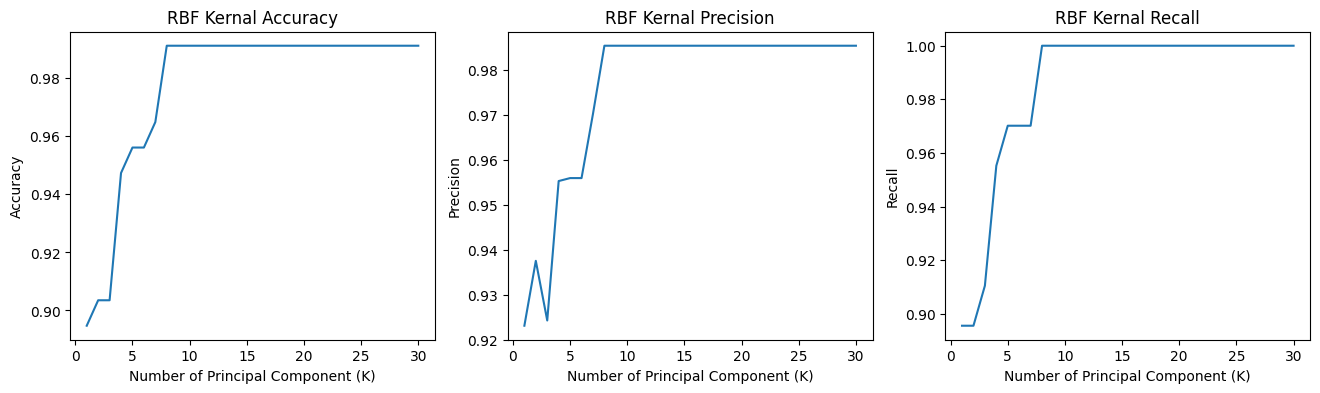

In [9]:
# RBF Kernel
accuracies_rbf=[]
precisions_rbf=[]
recalls_rbf=[]
N = [i for i in range(1,31)]
for K in N:
  pca = PCA(n_components=K)
  principalDf = pd.DataFrame(data = pca.fit_transform(X))
  X_train, X_test, Y_train, Y_test = train_test_split(principalDf.values, Y, test_size = 0.2, random_state = 0)
  classifier = SVC(kernel='rbf', C=3)
  classifier.fit(X_train, Y_train)
  Y_pred = classifier.predict(X_test)
  acc=metrics.accuracy_score(Y_test, Y_pred)
  prec=metrics.precision_score(Y_test, Y_pred,pos_label='Malignant')
  rec=metrics.recall_score(Y_test, Y_pred,pos_label='Malignant')
  accuracies_rbf.append(acc)
  precisions_rbf.append(prec)
  recalls_rbf.append(rec)

plt.figure(figsize=(16,4))

plt.subplot(1, 3, 1)
plt.plot(N, accuracies_rbf)
plt.title('RBF Kernal Accuracy')
plt.xlabel('Number of Principal Component (K)')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(N, precisions_rbf)
plt.title('RBF Kernal Precision')
plt.xlabel('Number of Principal Component (K)')
plt.ylabel('Precision')

plt.subplot(1, 3, 3)
plt.plot(N, recalls_rbf)
plt.title('RBF Kernal Recall')
plt.xlabel('Number of Principal Component (K)')
plt.ylabel('Recall')

optimal_k_rbf = N[accuracies_rbf.index(max(accuracies_rbf))]
optimal_accuracy_rbf = max(accuracies_rbf)
print(f"Optimal K for maximum accuracy with kernel RBF: {optimal_k_rbf}")
print(f"Accuracy at optimal K with kernel RBF: {optimal_accuracy_rbf}")



Optimal K for maximum accuracy with kernel polynomial: 4
Accuracy at optimal K with kernel polynomial: 0.9649122807017544


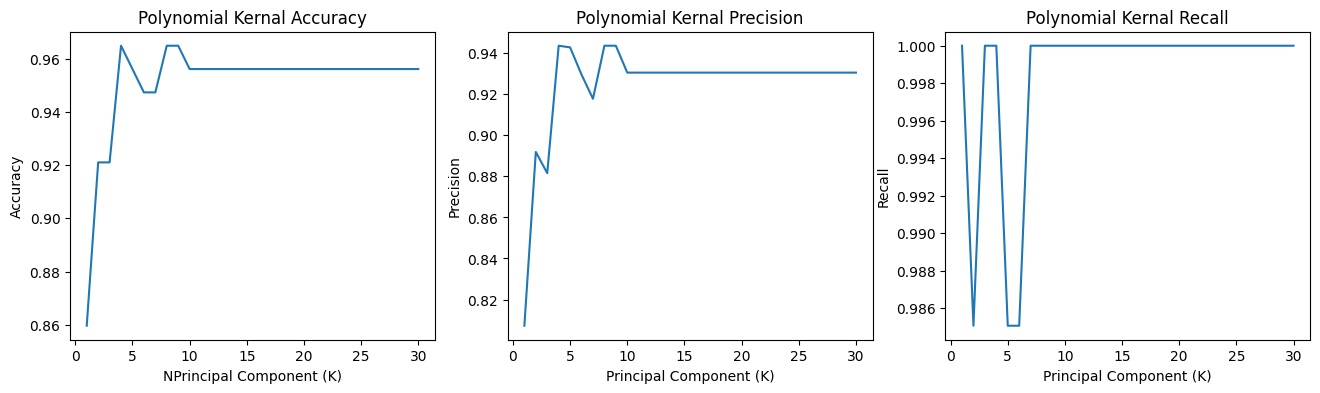

In [10]:
# Polynomial kernel
accuracies_Polynomial=[]
precisions_Polynomial=[]
recalls_Polynomial=[]
N = [i for i in range(1,31)]
for K in N:
  pca = PCA(n_components=K)
  principalDf = pd.DataFrame(data = pca.fit_transform(X))
  X_train, X_test, Y_train, Y_test = train_test_split(principalDf.values, Y, test_size = 0.2, random_state = 0)
  classifier = SVC(kernel='poly', C=3,degree=3)
  classifier.fit(X_train, Y_train)
  Y_pred = classifier.predict(X_test)
  acc=metrics.accuracy_score(Y_test, Y_pred)
  prec=metrics.precision_score(Y_test, Y_pred,pos_label='Malignant')
  rec=metrics.recall_score(Y_test, Y_pred,pos_label='Malignant')
  accuracies_Polynomial.append(acc)
  precisions_Polynomial.append(prec)
  recalls_Polynomial.append(rec)

plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.plot(N, accuracies_Polynomial)
plt.title('Polynomial Kernal Accuracy')
plt.xlabel('NPrincipal Component (K)')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(N, precisions_Polynomial)
plt.title('Polynomial Kernal Precision')
plt.xlabel('Principal Component (K)')
plt.ylabel('Precision')

plt.subplot(1, 3, 3)
plt.plot(N, recalls_Polynomial)
plt.title('Polynomial Kernal Recall')
plt.xlabel('Principal Component (K)')
plt.ylabel('Recall')

optimal_k_Polynomial = N[accuracies_Polynomial.index(max(accuracies_Polynomial))]
optimal_accuracy_Polynomial = max(accuracies_Polynomial)
print(f"Optimal K for maximum accuracy with kernel polynomial: {optimal_k_Polynomial}")
print(f"Accuracy at optimal K with kernel polynomial: {optimal_accuracy_Polynomial}")


Text(0, 0.5, 'Accuracy')

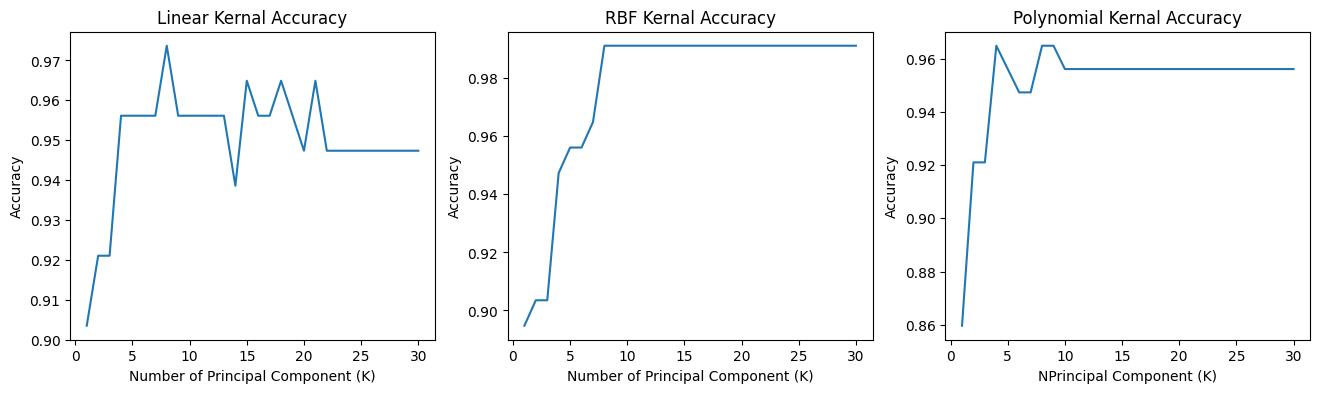

In [11]:
# Accuracy of the three kernels

plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.plot(N, accuracies_linear)
plt.title('Linear Kernal Accuracy')
plt.xlabel('Number of Principal Component (K)')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(N, accuracies_rbf)
plt.title('RBF Kernal Accuracy')
plt.xlabel('Number of Principal Component (K)')
plt.ylabel('Accuracy')


plt.subplot(1, 3, 3)
plt.plot(N, accuracies_Polynomial)
plt.title('Polynomial Kernal Accuracy')
plt.xlabel('NPrincipal Component (K)')
plt.ylabel('Accuracy')